#Analysis of different Major League Baseball player salaries

# Introduction / Motivation

Anybody who looks at the current salaries of the highest paid baseball players these days is immediately in awe. Max Scherzer recently set a record, making over 43 million dollars per year. Several players are making over 30 million, and over 50 MLB players are making at least 20 million dollars per year. Our work is an exploration into these salaries, seeing how much players really deserve such salaries. We will compare players to one another, taking note of how well they perform compared to other players, and how much money they make compared to other players. To learn more about the highest paid baseball players today, please look at https://www.nbcsports.com/washington/nationals/here-are-highest-paid-mlb-players-2022-season.
<br><br>
In this project, we will look both at batters and pitchers, comparing batters' salaries to other batters' salaries, and doing the same for pitchers. Our null hypothesis is that a player's performances has no affect on his salary. We hope to reject this null hypothesis, showing that there is indeed a correlation between these high-paid baseball players and their actual performace throughout the season.


# Data Collection

In this section, we will collect data for the batters and pitchers. In order to get all of the information we need for each player, we will also need to gather information from the salaries data table. We will then combine the salaries with the batters as well as with pitchers in order to view each player and their salary in the same dataframe.
<br><br>
In this first section, we begin by gathering the data from these data sets, and limiting them to the years between 1985 and 2016. Unfortunately, we were not able to find salary data that went beyond the year 2016.

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Gathering csv files and condensing to the 22 years between 1985 and 2016
data_batting = pd.read_csv("Batting.csv")
data_batting = data_batting[data_batting.yearID >= 1985][data_batting.yearID <= 2016]

data_pitching = pd.read_csv("Pitching.csv")
data_pitching = data_pitching[data_pitching.yearID >= 1985][data_pitching.yearID <= 2016]

data_salaries = pd.read_csv("Salaries.csv")
data_salaries = data_salaries[data_salaries.yearID >= 1985][data_salaries.yearID <= 2016]

data_people = pd.read_csv("People.csv")

# Condense the data to only include players playing between 1985 and 2016
data_people = data_people.dropna(subset = ['debut'])
def check_career(row) :
  if int(str(row['finalGame'])[:4]) <= 1985 or int(str(row['debut'])[:4]) >= 2016:
    return 'no'
  return 'yes'

data_people['career'] = data_people.apply (lambda row: check_career(row), axis=1)
data_people = data_people[data_people['career'] == 'yes']

#Drop unnecessary columns from the people dataframe
data_people = data_people.drop(['birthYear', 'birthMonth', 'birthDay', 
                                'birthCountry', 'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay', 
                                'deathCountry', 'deathState', 'deathCity', 'weight', 'height'], axis=1)
data_people = data_people.reset_index()

<ipython-input-2-5ca85491da51>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_batting = data_batting[data_batting.yearID >= 1985][data_batting.yearID <= 2016]
<ipython-input-2-5ca85491da51>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pitching = data_pitching[data_pitching.yearID >= 1985][data_pitching.yearID <= 2016]


Below, we are going to show the first few rows of the dataframes we will be working with throughout this project. The order these are shown is:
<br>
1) Batting
<br>
2) Pitching
<br>
3) Salaries
<br>
4) People

In [3]:
data_batting.head(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
62254,aasedo01,1985,1,BAL,AL,54,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
62255,abregjo01,1985,1,CHN,NL,6,9,0,0,0,...,1.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
62256,ackerji01,1985,1,TOR,AL,61,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
62257,adamsri02,1985,1,SFN,NL,54,121,12,23,3,...,10.0,1.0,1.0,5,23.0,3.0,1.0,3.0,0.0,2.0
62258,agostju01,1985,1,CHA,AL,54,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
62259,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,...,21.0,1.0,0.0,22,26.0,5.0,6.0,4.0,3.0,7.0
62260,aguilri01,1985,1,NYN,NL,22,36,1,10,2,...,2.0,0.0,0.0,1,5.0,0.0,0.0,7.0,0.0,1.0
62261,aikenwi01,1985,1,TOR,AL,12,20,2,4,1,...,5.0,0.0,0.0,3,6.0,0.0,0.0,0.0,1.0,1.0
62262,alexado01,1985,1,TOR,AL,36,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
62263,allenga01,1985,1,TOR,AL,14,34,2,4,1,...,3.0,0.0,0.0,0,10.0,0.0,0.0,0.0,0.0,1.0


In [4]:
data_pitching.head(10)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
24984,aasedo01,1985,1,BAL,AL,10,6,54,0,0,...,7.0,0,1.0,1,366.0,43,44,5.0,3.0,13.0
24985,abregjo01,1985,1,CHN,NL,1,1,6,5,0,...,1.0,0,0.0,0,109.0,0,18,5.0,1.0,3.0
24986,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,1.0,2,3.0,0,370.0,26,35,1.0,2.0,16.0
24987,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,1.0,0,3.0,0,246.0,21,27,3.0,3.0,4.0
24988,aguilri01,1985,1,NYN,NL,10,7,21,19,2,...,2.0,5,2.0,2,507.0,1,49,7.0,4.0,8.0
24989,alexado01,1985,1,TOR,AL,17,10,36,36,6,...,0.0,9,6.0,0,1090.0,0,105,6.0,3.0,15.0
24990,allenne01,1985,1,SLN,NL,1,4,23,1,0,...,6.0,1,1.0,1,135.0,13,22,1.0,3.0,3.0
24991,allenne01,1985,2,NYA,AL,1,0,17,0,0,...,0.0,2,0.0,0,124.0,10,9,0.0,0.0,3.0
24992,anderla02,1985,1,PHI,NL,3,3,57,0,0,...,4.0,1,3.0,1,318.0,19,41,3.0,1.0,4.0
24993,andujjo01,1985,1,SLN,NL,21,12,38,38,10,...,12.0,2,11.0,0,1127.0,0,113,11.0,4.0,32.0


In [5]:
data_salaries.head(10)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
5,1985,ATL,NL,chambch01,800000
6,1985,ATL,NL,dedmoje01,150000
7,1985,ATL,NL,forstte01,483333
8,1985,ATL,NL,garbege01,772000
9,1985,ATL,NL,harpete01,250000


In [6]:
data_people.head(10)

,index,playerID,nameFirst,nameLast,nameGiven,bats,throws,debut,finalGame,retroID,bbrefID,career
0,0,aardsda01,David,Aardsma,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,yes
1,3,aasedo01,Don,Aase,Donald William,R,R,1977-07-26,1990-10-03,aased001,aasedo01,yes
2,4,abadan01,Andy,Abad,Fausto Andres,L,L,2001-09-10,2006-04-13,abada001,abadan01,yes
3,5,abadfe01,Fernando,Abad,Fernando Antonio,L,L,2010-07-28,2021-10-01,abadf001,abadfe01,yes
4,14,abbotje01,Jeff,Abbott,Jeffrey William,R,L,1997-06-10,2001-09-29,abboj002,abbotje01,yes
5,15,abbotji01,Jim,Abbott,James Anthony,L,L,1989-04-08,1999-07-21,abboj001,abbotji01,yes
6,16,abbotku01,Kurt,Abbott,Kurt Thomas,R,R,1993-09-07,2001-04-13,abbok002,abbotku01,yes
7,17,abbotky01,Kyle,Abbott,Lawrence Kyle,L,L,1991-09-10,1996-08-24,abbok001,abbotky01,yes
8,19,abbotpa01,Paul,Abbott,Paul David,R,R,1990-08-21,2004-08-07,abbop001,abbotpa01,yes
9,22,abercre01,Reggie,Abercrombie,Reginald Damascus,R,R,2006-04-04,2008-09-28,aberr001,abercre01,yes


#Data Management and Representation

Now that we have our data sets loaded into dataframes, we will add some necessary columns to our dataframes that will be instrumental in testing our hypothesis. We will use some graphs to explain why each additional column of the dataframe is necessary.

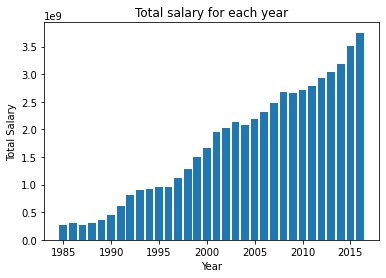

In [7]:
# Create a bar graph of the total salaries per year

#Create dictionary to stores total payroll as values, and years as keys
salaries = {}

#Add each year to the dictionary
for year in data_salaries['yearID'].unique():
  salaries[year] = 0

#Calculate total payroll per year
for index, row in data_salaries.iterrows():
  salaries[row.yearID] += row.salary

#Create the plot
plt.bar(salaries.keys(), salaries.values())
plt.ylabel("Total Salary")
plt.xlabel("Year")
plt.title("Total salary for each year")
plt.show()

To start off, we will address the issue of the fact that baseball players get paid more now than in 1985. Baseball is much more popular than it has been before, the league minimum is rising, and the superstars are being paid hundreds of times what they used to. Because of this, we will add a column in our dataframe that represents the fraction of the total payroll a player is being paid. This will allow us to compare salaries between then 2010's and 1980's without too much trouble.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


Text(0.5, 1.0, 'Salary of Each Player in Comparison to Total Payroll by Year')

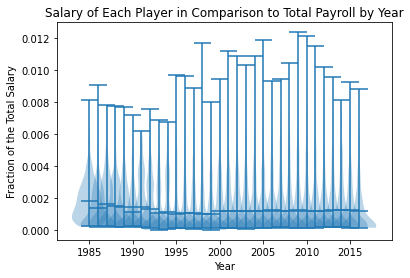

In [8]:
#Create violin plot of each players salary per year

#Convert salary to a fraction of the total payroll for that year
def salary_fraction (row):
  return row.salary / salaries[row.yearID]

data_salaries['salary_fraction'] = data_salaries.apply (lambda row: salary_fraction(row), axis=1)

#Create dictionary to store salary fractions as values and years as keys
salaries_fractions = {}

#Add all years to the dictionary
for year in data_salaries['yearID'].unique():
  salaries_fractions[year] = []

#Add each player's salary fraction to the dictionary
for index, row in data_salaries.iterrows():
  salaries_fractions[row['yearID']].append(row.salary_fraction)

    
#Create the plot
fig_res, ax_res = plt.subplots()

ax_res.violinplot(salaries_fractions.values(),salaries_fractions.keys(),widths=4,showmeans=True)
ax_res.set_xlabel("Year")
ax_res.set_ylabel("Fraction of the Total Salary")
ax_res.set_title("Salary of Each Player in Comparison to Total Payroll by Year")

This graph is clearly very difficult to understand, so we will group time frames in terms of five years each. This will help us interperet graphs much easier.

Text(0.5, 1.0, 'Salary of Each Player in Comparison to Total Payroll by Five Year Span')

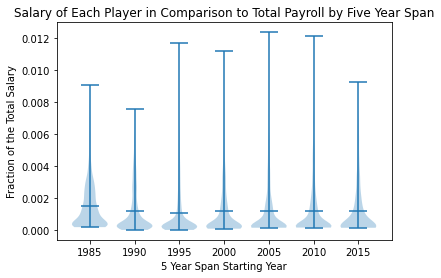

In [9]:
#Create a violin plot of each players salary per five year span

#Round down to the nearest 5
def round_down_5(row):
  n = row['yearID']
  return n//5*5

data_salaries['5_year_span_start'] = data_salaries.apply (lambda row: round_down_5(row), axis=1)


#Create dictionary to store salary fractions as values and years as keys
salaries_fractions = {}

#Add all five year spans to the dictionary by starting year
for year in data_salaries['5_year_span_start'].unique():
  salaries_fractions[year] = []

#Add each player's salary fraction to the dictionary
for index, row in data_salaries.iterrows():
  salaries_fractions[row['5_year_span_start']].append(row.salary_fraction)

    
    
#Create the plot
fig_res, ax_res = plt.subplots()

ax_res.violinplot(salaries_fractions.values(),salaries_fractions.keys(),widths=4,showmeans=True)
ax_res.set_xlabel("5 Year Span Starting Year")
ax_res.set_ylabel("Fraction of the Total Salary")
ax_res.set_title("Salary of Each Player in Comparison to Total Payroll by Five Year Span")

That's much better! We can see through this violin plot that relative to other players, each player has continued to be paid a similar amount. The overwhelming majority of players make around .001 of the total payroll, with the mean being around .0015 to .002 each year. This will be a better measure to use when comparing data throughout different years.

Now let's add that data to our batters and pitchers dataframes.

In [10]:
data_batting.head(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
62254,aasedo01,1985,1,BAL,AL,54,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
62255,abregjo01,1985,1,CHN,NL,6,9,0,0,0,...,1.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
62256,ackerji01,1985,1,TOR,AL,61,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
62257,adamsri02,1985,1,SFN,NL,54,121,12,23,3,...,10.0,1.0,1.0,5,23.0,3.0,1.0,3.0,0.0,2.0
62258,agostju01,1985,1,CHA,AL,54,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
62259,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,...,21.0,1.0,0.0,22,26.0,5.0,6.0,4.0,3.0,7.0
62260,aguilri01,1985,1,NYN,NL,22,36,1,10,2,...,2.0,0.0,0.0,1,5.0,0.0,0.0,7.0,0.0,1.0
62261,aikenwi01,1985,1,TOR,AL,12,20,2,4,1,...,5.0,0.0,0.0,3,6.0,0.0,0.0,0.0,1.0,1.0
62262,alexado01,1985,1,TOR,AL,36,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
62263,allenga01,1985,1,TOR,AL,14,34,2,4,1,...,3.0,0.0,0.0,0,10.0,0.0,0.0,0.0,0.0,1.0


In [11]:
#Merge the batters data with the salary information
batters = data_batting.merge(
     data_salaries,
     on=["yearID", "playerID"],
     how="left",
 )

#Drop all batters whose salary is not available
batters = batters.dropna(subset = ['salary'])

#Merge the pitchers data with the salary information
pitchers = data_pitching.merge(
     data_salaries,
     on=["yearID", "playerID"],
     how="left",
 )

#Drop all pitchers whose salary is not available
pitchers = pitchers.dropna(subset = ['salary'])

Now let's only look at a select subset of the batters and pitchers. We only want the players who played enough games in the season.

In [12]:
#Drop all batters who had fewer than 100 AB for a given year
batters = batters[batters.AB > 100]

#Drop all pitchers who appeared in fewer than 30 games for a given year
pitchers = pitchers[pitchers.G > 30]

We also don't want to look at players on their rookie contracts, as those tend to be far too high or far too low very often. So let's only look at players who have been in the majors for at least 5 years.

In [13]:
# Merging all career lengths to associated pitchers
pitchers = pd.merge(pitchers, data_people, on='playerID', how='inner')

# Merging all career lengths to associated batters
batters = pd.merge(batters, data_people, on='playerID', how='inner')
 
# Only accounting for pitchers playing for at least 5 years since they will have signed a larger contract
pitchers['career_length'] = pitchers.apply (lambda row: row['yearID'] - int(str(row['debut'])[:4]), axis=1)
pitchers = pitchers[pitchers.career_length >= 5]

# Only accounting for batters playing for at least 5 years since they will have signed a larger contract
batters['career_length'] = batters.apply (lambda row: row['yearID'] - int(str(row['debut'])[:4]), axis=1)
batters = batters[batters.career_length >= 5]

Now let's see what we have in terms of statistics for our batters then our pitchers.

In [14]:
batters.columns

Index(['playerID', 'yearID', 'stint', 'teamID_x', 'lgID_x', 'G', 'AB', 'R',
       'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP',
       'SH', 'SF', 'GIDP', 'teamID_y', 'lgID_y', 'salary', 'salary_fraction',
       '5_year_span_start', 'index', 'nameFirst', 'nameLast', 'nameGiven',
       'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID', 'career',
       'career_length'],
      dtype='object')

In [15]:
pitchers.columns

Index(['playerID', 'yearID', 'stint', 'teamID_x', 'lgID_x', 'W', 'L', 'G',
       'GS', 'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP',
       'teamID_y', 'lgID_y', 'salary', 'salary_fraction', '5_year_span_start',
       'index', 'nameFirst', 'nameLast', 'nameGiven', 'bats', 'throws',
       'debut', 'finalGame', 'retroID', 'bbrefID', 'career', 'career_length'],
      dtype='object')

That's looking pretty good, but we seem to be missing a few key statistics. Let's add OPS and batting average for the batters. Check https://honestbaseball.com/baseball-statistics/ for more information on these statistics.

In [16]:
#Create column for batter's OPS
def ops (row):
  slugging = (row['H'] + row['2B'] + 2 * row['3B'] + 3 * row['HR']) / row['AB']
  OBP = (row['BB'] + row['IBB'] + row['HBP'] + row['H']) / (row['AB'] + row['BB'] + row['IBB'] + row['SH'] + row['SF'] + row['HBP'])
  return slugging + OBP

batters['OPS'] = batters.apply (lambda row: ops(row), axis = 1)

#Create column for batter's batting average
batters['AVG'] = batters['H'] / batters['AB']

batters.head(10)

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,bats,throws,debut,finalGame,retroID,bbrefID,career,career_length,OPS,AVG
0,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,...,R,R,1980-04-19,1989-09-30,agual001,aguaylu01,yes,5,0.852033,0.278788
1,aguaylu01,1986,1,PHI,NL,62,133,17,28,6,...,R,R,1980-04-19,1989-09-30,agual001,aguaylu01,yes,6,0.628026,0.210526
2,aguaylu01,1987,1,PHI,NL,94,209,25,43,9,...,R,R,1980-04-19,1989-09-30,agual001,aguaylu01,yes,7,0.702962,0.205742
3,aguaylu01,1988,2,NYA,AL,50,140,12,35,4,...,R,R,1980-04-19,1989-09-30,agual001,aguaylu01,yes,8,0.636190,0.250000
4,almonbi01,1985,1,PIT,NL,88,244,33,66,17,...,R,R,1974-09-02,1988-06-14,almob001,almonbi01,yes,11,0.738752,0.270492
5,almonbi01,1986,1,PIT,NL,102,196,29,43,7,...,R,R,1974-09-02,1988-06-14,almob001,almonbi01,yes,12,0.705929,0.219388
6,armasto01,1985,1,BOS,AL,103,385,50,102,17,...,R,R,1976-09-06,1989-10-01,armat001,armasto01,yes,9,0.818634,0.264935
7,armasto01,1986,1,BOS,AL,121,425,40,112,21,...,R,R,1976-09-06,1989-10-01,armat001,armasto01,yes,10,0.715579,0.263529
8,armasto01,1988,1,CAL,AL,120,368,42,100,20,...,R,R,1976-09-06,1989-10-01,armat001,armasto01,yes,12,0.753367,0.271739
9,armasto01,1989,1,CAL,AL,60,202,22,52,7,...,R,R,1976-09-06,1989-10-01,armat001,armasto01,yes,13,0.751732,0.257426


Now let's add those key statistics for the pitchers. We will add the strikeout and walk percentages for each of the pitchers. Check https://honestbaseball.com/baseball-statistics/ for more information on these statistics.

In [17]:
#Create column for pitcher's walk percentage
pitchers['BB%'] = pitchers['BB'] / pitchers['IPouts']

#Create column for pitcher's strikeout percentage
pitchers['SO%'] = pitchers['SO'] / pitchers['IPouts']

pitchers.head(10)

,playerID,yearID,stint,teamID_x,lgID_x,W,L,G,GS,CG,...,bats,throws,debut,finalGame,retroID,bbrefID,career,career_length,BB%,SO%
2,ackerji01,1989,1,ATL,NL,0,6,59,0,0,...,R,R,1983-04-07,1992-06-14,ackej001,ackerji01,yes,6,0.068259,0.232082
3,ackerji01,1990,1,TOR,AL,4,4,59,0,0,...,R,R,1983-04-07,1992-06-14,ackej001,ackerji01,yes,7,0.109091,0.196364
5,agostju01,1988,1,HOU,NL,10,2,75,0,0,...,L,L,1981-09-07,1993-06-19,agosj001,agostju01,yes,7,0.109091,0.120000
6,agostju01,1989,1,HOU,NL,4,5,71,0,0,...,L,L,1981-09-07,1993-06-19,agosj001,agostju01,yes,8,0.128514,0.184739
7,agostju01,1990,1,HOU,NL,9,8,82,0,0,...,L,L,1981-09-07,1993-06-19,agosj001,agostju01,yes,9,0.140794,0.180505
8,agostju01,1991,1,SLN,NL,5,3,72,0,0,...,L,L,1981-09-07,1993-06-19,agosj001,agostju01,yes,10,0.151163,0.131783
9,alexado01,1985,1,TOR,AL,17,10,36,36,6,...,R,R,1971-06-26,1989-09-27,alexd001,alexado01,yes,14,0.085678,0.181586
10,alexado01,1988,1,DET,AL,14,11,34,34,5,...,R,R,1971-06-26,1989-09-27,alexd001,alexado01,yes,17,0.066958,0.183406
11,alexado01,1989,1,DET,AL,6,18,33,33,5,...,R,R,1971-06-26,1989-09-27,alexd001,alexado01,yes,18,0.113602,0.142003
12,anderla02,1985,1,PHI,NL,3,3,57,0,0,...,R,R,1975-09-05,1994-07-31,andel001,anderla02,yes,10,0.118721,0.228311


#Data Exploration
Let's begin our exploration of the data by looking at our batters. As mentioned above, the three statistics we will be looking into are their OPS, batting average, and home runs. To preliminarily explore these three statistics, we are going to compare the players who make above .15% of the total payroll to those who do not. .15% seems to be approximately the mean for each year, as seen in the violin plot above.

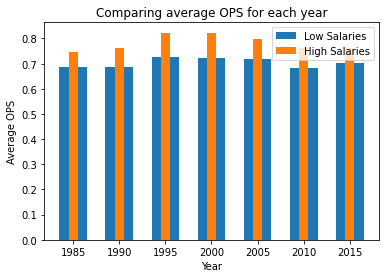

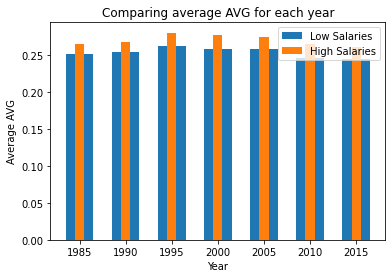

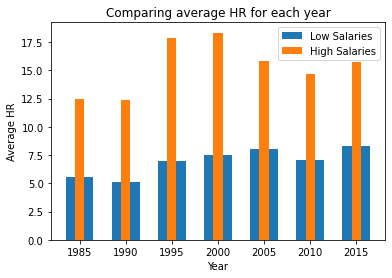

In [18]:
#Create column to indicate if batters are paid more than .15% of the total payroll
batters['high_paid'] = batters.apply (lambda row: row['salary_fraction'] > 0.0015, axis=1)

#Create dictionary for average values of each statistic per five year span
stat_avg = {}

#Graph the players making above .15% of the total payroll vs those making less by statistic
for stat in ['OPS', 'AVG', 'HR']:
  stat_avg[stat] = []
  
  #Create dictionary for those making less than .15% of the total payroll
  player_stats_low = {}

  #Create dictionary for those making more than .15% of the total payroll
  player_stats_high = {}
  
  for span in batters['5_year_span_start'].unique():
    
    #Add average value for that stat to stat_avg dictionary
    year_mean = batters.loc[batters['5_year_span_start'] == span, stat].mean()
    stat_avg[stat].append(year_mean)
   
    #Add average value for that stat among player's making less than .15% of total payroll to year_mean_low dictionary
    year_mean_low = batters.loc[(batters['5_year_span_start'] == span) & (batters['high_paid'] == False), stat].mean()
    player_stats_low[span] = year_mean_low

    #Add average value for that stat among player's making more than .15% of total payroll to year_mean_high dictionary
    year_mean_high = batters.loc[(batters['5_year_span_start'] == span) & (batters['high_paid'] == True), stat].mean()
    player_stats_high[span] = year_mean_high

  #Create the plot
  plt.bar(player_stats_low.keys(), player_stats_low.values(), 3, label = "Low Salaries")
  plt.bar(player_stats_high.keys(), player_stats_high.values(), 1, label = "High Salaries")
  plt.ylabel("Average " + stat)
  plt.xlabel("Year")
  plt.title("Comparing average " + stat + " for each year")
  plt.legend()
  plt.show()

Clearly there is some difference between the players who get paid more and those who get paid less. In order to investigate further, let's create an interaction term to combine these three statistics. Since the home runs seem to be much more indicative of more pay, we will weight home runs higher for our interaction term.

In [19]:
#Create interaction term column for each of our batters
def get_interaction (row):
  span = row['5_year_span_start']
  norm_ops = row['OPS'] / stat_avg['OPS'][int((span-1985)//5)]
  norm_avg = row['AVG'] / stat_avg['AVG'][int((span-1985)//5)]
  norm_hr = row['HR'] / stat_avg['HR'][int((span-1985)//5)]
  return (norm_ops + norm_avg + 2 * norm_hr) / 4


batters['interaction_term'] = batters.apply(lambda row: get_interaction(row), axis = 1)

Let's see those interaction terms we just generated

In [20]:
batters.head(10)

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,debut,finalGame,retroID,bbrefID,career,career_length,OPS,AVG,high_paid,interaction_term
0,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,...,1980-04-19,1989-09-30,agual001,aguaylu01,yes,5,0.852033,0.278788,False,0.860086
1,aguaylu01,1986,1,PHI,NL,62,133,17,28,6,...,1980-04-19,1989-09-30,agual001,aguaylu01,yes,6,0.628026,0.210526,False,0.617823
2,aguaylu01,1987,1,PHI,NL,94,209,25,43,9,...,1980-04-19,1989-09-30,agual001,aguaylu01,yes,7,0.702962,0.205742,False,1.036397
3,aguaylu01,1988,2,NYA,AL,50,140,12,35,4,...,1980-04-19,1989-09-30,agual001,aguaylu01,yes,8,0.636190,0.250000,False,0.608988
4,almonbi01,1985,1,PIT,NL,88,244,33,66,17,...,1974-09-02,1988-06-14,almob001,almonbi01,yes,11,0.738752,0.270492,False,0.813071
5,almonbi01,1986,1,PIT,NL,102,196,29,43,7,...,1974-09-02,1988-06-14,almob001,almonbi01,yes,12,0.705929,0.219388,False,0.802208
6,armasto01,1985,1,BOS,AL,103,385,50,102,17,...,1976-09-06,1989-10-01,armat001,armasto01,yes,9,0.818634,0.264935,True,1.679646
7,armasto01,1986,1,BOS,AL,121,425,40,112,21,...,1976-09-06,1989-10-01,armat001,armasto01,yes,10,0.715579,0.263529,True,1.046738
8,armasto01,1988,1,CAL,AL,120,368,42,100,20,...,1976-09-06,1989-10-01,armat001,armasto01,yes,12,0.753367,0.271739,False,1.167006
9,armasto01,1989,1,CAL,AL,60,202,22,52,7,...,1976-09-06,1989-10-01,armat001,armasto01,yes,13,0.751732,0.257426,False,1.053312


Let's now look at a violin plot of the interaction terms for each player. This plot will be very helpful, as we can see not just what the mean is, but also what the distribution is. Clearly, based on how the interaction term was calculated, the mean will be 1 for each five year span. This, however, will let us compare the distributions among each five year span.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


Text(0.5, 1.0, 'Interaction term of players by year')

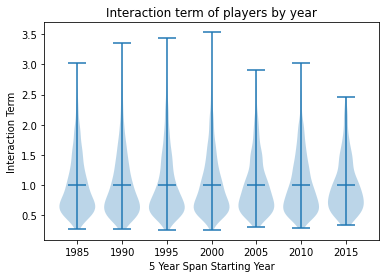

In [21]:
#Create dictionary for interaction terms by five year span
term_means = {}

#For each batter, add there interaction term to the right five year span
for index, row in batters.iterrows():
  if row['5_year_span_start'] not in term_means.keys():
    term_means[row['5_year_span_start']] = []
  term_means[row['5_year_span_start']].append(row['interaction_term'])
    
#Create the plot
fig_res, ax_res = plt.subplots()

ax_res.violinplot(term_means.values(), term_means.keys(), widths=4,showmeans=True)
ax_res.set_xlabel("5 Year Span Starting Year")
ax_res.set_ylabel("Interaction Term")
ax_res.set_title("Interaction term of players by year")


This is great news! We can see that the distributions among all seven five year spans look very similar. This, along with the fact that the salary fraction distributions look similar, will allow for the ability to actually compare these two values among different five year spans.

Now that we know that the salary fraction and interaction terms should have roughly the same distributions throughout all of our five year spans, let's do some graphing. Because these two values have consistent distributions throughout all spans, we will be able to include all players from any time span in our scatterplot. 

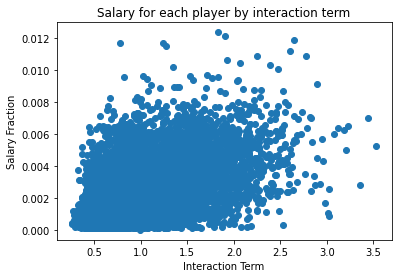

In [22]:
#Create scatterplot of all batters interaction terms
plt.scatter(batters['interaction_term'], batters['salary_fraction'])
plt.xlabel("Interaction Term")
plt.ylabel("Salary Fraction")
plt.title("Salary for each player by interaction term")

plt.show()

As assumed, this is a very messy scatterplot. With thousands of data points, we are not able to see very much information from this plot. In order to see a bit more information from our plot, let's create salary brackets. Instead of looking at the exact salary fraction of each player, we can look at their salary bracket. Let's make each bracket the size of .05% of the total payroll. For example, all players who make betwenn .1% and .15% of the total payroll will be put in the same bracket. This will limit total datapoints in order to more easily interperet our scatterplot.

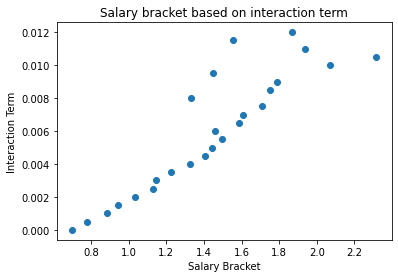

In [23]:
#Round down to the nearest .0005 = .05%
def round_down_0005(row):
  n = row['salary_fraction'] * 10000
  return n // 5 * 5 / 10000

#Create a salary bracket for each batter
batters['salary_bracket'] = batters.apply (lambda row: round_down_0005(row), axis=1)

#Create a dictionary for the interaction terms by salary bracket
brackets = {}

#Add the average interaction term for each salary bracket to brackets dictionary
for brack in batters['salary_bracket'].unique():
  brackets[brack] = batters.loc[batters['salary_bracket'] == brack, 'interaction_term'].mean()

#Make the plot
plt.scatter(brackets.values(), brackets.keys())
plt.xlabel("Salary Bracket")
plt.ylabel("Interaction Term")
plt.title("Salary bracket based on interaction term")

plt.show()

That is a much nicer looking graph. We will go into more depth on it when we formally test our hypothesis. For now, however, let's look at the pitchers. We will begin in the same way we did with our batters. let's look at a few statistics, and compare how the high paid players did compared to the lower paid ones.

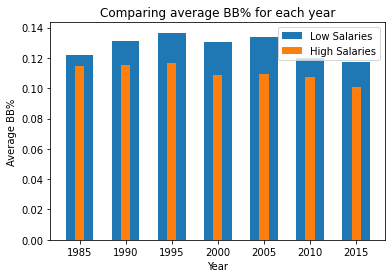

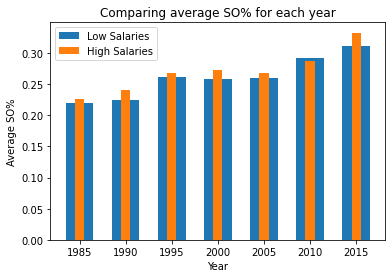

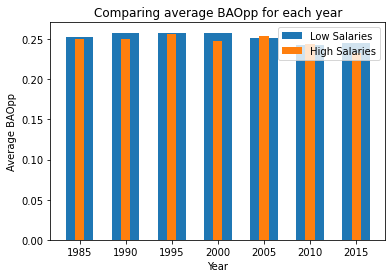

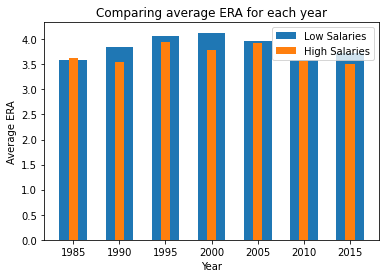

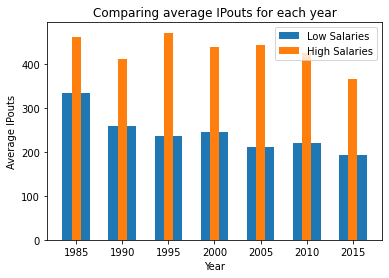

In [24]:
#Create column to indicate if pitchers are paid more than .15% of the total payroll
pitchers['high_paid'] = pitchers.apply (lambda row: row['salary_fraction'] > 0.0015, axis=1)

#Create dictionary for average values of each statistic per five year span
stat_avg = {}

#Graph the players making above .15% of the total payroll vs those making less by statistic
for stat in ['BB%', 'SO%', 'BAOpp', 'ERA', 'IPouts']:
  stat_avg[stat] = []
  
  #Create dictionary for those making less than .15% of the total payroll
  player_stats_low = {}

  #Create dictionary for those making more than .15% of the total payroll
  player_stats_high = {}
  
  for span in pitchers['5_year_span_start'].unique():
    
    #Add average value for that stat to stat_avg dictionary
    year_mean = pitchers.loc[pitchers['5_year_span_start'] == span, stat].mean()
    stat_avg[stat].append(year_mean)
   
    #Add average value for that stat among player's making less than .15% of total payroll to year_mean_low dictionary
    year_mean_low = pitchers.loc[(pitchers['5_year_span_start'] == span) & (pitchers['high_paid'] == False), stat].mean()
    player_stats_low[span] = year_mean_low

    #Add average value for that stat among player's making more than .15% of total payroll to year_mean_high dictionary
    year_mean_high = pitchers.loc[(pitchers['5_year_span_start'] == span) & (pitchers['high_paid'] == True), stat].mean()
    player_stats_high[span] = year_mean_high

  #Create the plot
  plt.bar(player_stats_low.keys(), player_stats_low.values(), 3, label = "Low Salaries")
  plt.bar(player_stats_high.keys(), player_stats_high.values(), 1, label = "High Salaries")
  plt.ylabel("Average " + stat)
  plt.xlabel("Year")
  plt.title("Comparing average " + stat + " for each year")
  plt.legend()
  plt.show()


Fantastic! We have gotten similar results to those of the batters. Clearly there is some difference between the players who get paid more and those who get paid less. In order to investigate further, let's create an interaction term to combine these three statistics. Since the innings pitched seem to be much more indicative of more pay, we will weight those higher for our interaction term.

In [25]:
#Create interaction term column for each of our pitchers
def get_interaction(row) :  
  k_avg = row['SO%'] / stat_avg['SO%'][int((span-1985)//5)]
  bb_avg = row['BB%'] / stat_avg['BB%'][int((span-1985)//5)]
  era = row['ERA'] / stat_avg['ERA'][int((span-1985)//5)]
  baopp = row['BAOpp'] / stat_avg['BAOpp'][int((span-1985)//5)]
  inn = row['IPouts'] / stat_avg['IPouts'][int((span-1985)//5)]

  return (k_avg - bb_avg - era - baopp + 2 * inn) / 6

pitchers['interaction_term'] = pitchers.apply(lambda row: get_interaction(row), axis = 1)


Let's see those interaction terms we just generated

In [26]:
pitchers.head(10)

,playerID,yearID,stint,teamID_x,lgID_x,W,L,G,GS,CG,...,debut,finalGame,retroID,bbrefID,career,career_length,BB%,SO%,high_paid,interaction_term
2,ackerji01,1989,1,ATL,NL,0,6,59,0,0,...,1983-04-07,1992-06-14,ackej001,ackerji01,yes,6,0.068259,0.232082,True,0.104213
3,ackerji01,1990,1,TOR,AL,4,4,59,0,0,...,1983-04-07,1992-06-14,ackej001,ackerji01,yes,7,0.109091,0.196364,True,-0.082398
5,agostju01,1988,1,HOU,NL,10,2,75,0,0,...,1981-09-07,1993-06-19,agosj001,agostju01,yes,7,0.109091,0.120000,False,-0.011948
6,agostju01,1989,1,HOU,NL,4,5,71,0,0,...,1981-09-07,1993-06-19,agosj001,agostju01,yes,8,0.128514,0.184739,True,-0.092101
7,agostju01,1990,1,HOU,NL,9,8,82,0,0,...,1981-09-07,1993-06-19,agosj001,agostju01,yes,9,0.140794,0.180505,True,-0.143012
8,agostju01,1991,1,SLN,NL,5,3,72,0,0,...,1981-09-07,1993-06-19,agosj001,agostju01,yes,10,0.151163,0.131783,True,-0.252789
9,alexado01,1985,1,TOR,AL,17,10,36,36,6,...,1971-06-26,1989-09-27,alexd001,alexado01,yes,14,0.085678,0.181586,True,0.618210
10,alexado01,1988,1,DET,AL,14,11,34,34,5,...,1971-06-26,1989-09-27,alexd001,alexado01,yes,17,0.066958,0.183406,True,0.475373
11,alexado01,1989,1,DET,AL,6,18,33,33,5,...,1971-06-26,1989-09-27,alexd001,alexado01,yes,18,0.113602,0.142003,True,0.356682
12,anderla02,1985,1,PHI,NL,3,3,57,0,0,...,1975-09-05,1994-07-31,andel001,anderla02,yes,10,0.118721,0.228311,False,-0.169164


Let's now look at a violin plot of the interaction terms for each player. This plot will be very helpful, as we can see not just what the mean is, but also what the distribution is. Clearly, based on how the interaction term was calculated, the mean will be 1 for each five year span. This, however, will let us compare the distributions among each five year span.

dict_values([[0.10421290317729104, -0.011947938346653864, -0.0921010635149303, 0.6182104757458675, 0.47537326472779046, 0.3566815286963707, -0.16916379282451258, -0.16172373853630073, -0.16172373853630073, 0.016884602966995343, 0.021859273583053878, 0.15775805441060256, 0.6130068144583561, -0.08505909148043529, 0.324359872740761, 0.524917623554625, 0.27579668397123513, -0.03328636914579993, -0.0026798523485166057, 0.03219213077767543, -0.10613697436874996, -0.1605340686405912, -0.17686192648021612, -0.1420621420913507, 0.0418685131627472, -0.07740600909442226, 0.004452092764680726, 0.07854852804349603, 0.4714531313232675, -0.04100121115648525, 0.28711870873235895, 0.41032089947003986, 0.4428391516218766, 0.3902278354200259, 0.01645187982687794, -0.02970569143134827, 0.5744278877309724, 0.3370851258136185, -0.12747810865173767, -0.19872970531805087, -0.1293303913728517, -0.15527775883262881, -0.40315376420946897, -0.39290101646555226, -0.003810859268038258, -0.24470612702267922, -0.0690

Text(0.5, 1.0, 'Interaction term of players by year')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


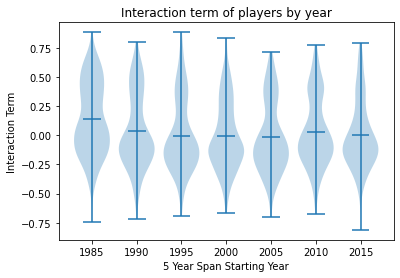

In [27]:
term_means = {}

for index, row in pitchers.iterrows():
  if row['5_year_span_start'] not in term_means.keys():
    term_means[row['5_year_span_start']] = []
  term_means[row['5_year_span_start']].append(row['interaction_term'])

print(term_means.values())

fig_res, ax_res = plt.subplots()
    
#Create the plot
ax_res.violinplot(term_means.values(), term_means.keys(), widths=4,showmeans=True)
ax_res.set_xlabel("5 Year Span Starting Year")
ax_res.set_ylabel("Interaction Term")
ax_res.set_title("Interaction term of players by year")

Similarly to the batters, we see very similar distributions throughout the years. It varies slightly more than it did with the batters, but they are still similar enough that results among different years will still be quite meaningful.

Now that we know that the salary fraction and interaction terms should have roughly the same distributions throughout all of our five year spans, let's make the same scatterplot for pitching as we did for batting.

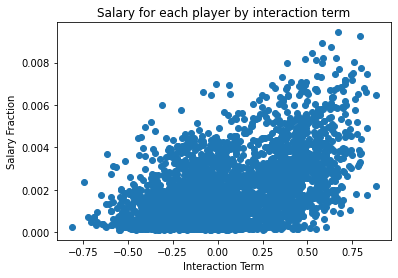

In [28]:
#Create scatterplot of all pitchers interaction terms
plt.scatter(pitchers['interaction_term'], pitchers['salary_fraction'])
plt.xlabel("Interaction Term")
plt.ylabel("Salary Fraction")
plt.title("Salary for each player by interaction term")

plt.show()

As was the case with the batters, this is a very messy scatterplot. With thousands of data points, we are not able to see very much information from this plot. In order to see a bit more information from our plot, let's create salary brackets, just as we did for our batters.

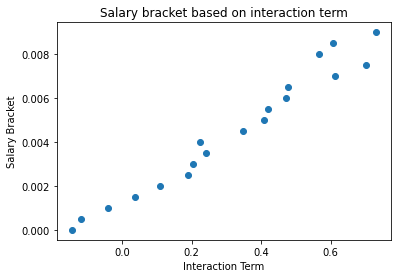

In [29]:
def round_down_0005(row):
  n = row['salary_fraction'] * 10000
  return n // 5 * 5 / 10000

pitchers['salary_bracket'] = pitchers.apply (lambda row: round_down_0005(row), axis=1)

brackets = {}

for brack in pitchers['salary_bracket'].unique():
  brackets[brack] = pitchers.loc[pitchers['salary_bracket'] == brack, 'interaction_term'].mean()


plt.scatter(brackets.values(), brackets.keys())
plt.xlabel("Interaction Term")
plt.ylabel("Salary Bracket")
plt.title("Salary bracket based on interaction term")

plt.show()

We see a huge amount of correlation between the salary bracket and the interaction term here. Now that we have looked into our pitchers and batters, let's test our initial hypothesis.

#Hypothesis Testing

In case you don't remember, our null hypothesis for this experiment is that a player's performace has no impact on the player's salary. We are trying to prove that, in fact, there is a correlation between these two values. We have presented a fair amount of graphs in order to explore our data, and to test our hypothesis, we are going to look at a few of the graphs more closely.

Let's begin again with our batters. We will look at the scatterplot from above. This time, however, we will include a trendline. Recall that looking at exact salaries resulted in a very messy graph that looked to be filled with points. Because of this, we will use the graph with salary brackets in order to test our hypothesis.

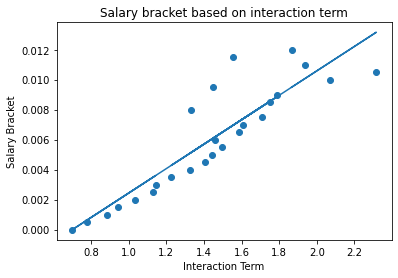

In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np

brackets = {}

for brack in batters['salary_bracket'].unique():
  brackets[brack] = batters.loc[batters['salary_bracket'] == brack, 'interaction_term'].mean()


y = np.array(list(brackets.keys())).reshape(-1,1)
x = np.array(list(brackets.values())).reshape(-1,1)

#Initialize and fit the model
reg_bat = LinearRegression()
reg_bat.fit(x, y)

plt.plot(x, reg_bat.predict(x))

plt.scatter(brackets.values(), brackets.keys())
plt.xlabel("Interaction Term")
plt.ylabel("Salary Bracket")
plt.title("Salary bracket based on interaction term")

plt.show()

That looks pretty promising. Let's calculate the R-squared value to make sure there is a correlation between the interaction term and the salary bracket.

In [31]:
# compute with formulas from the theory
guess = reg_bat.predict(x)
residuals = sum((y-guess)**2)       
total = sum((y-np.mean(y))**2)     
r_squared = 1 - residuals/total
print(r_squared)

[0.79910965]


We see that our R-squared value is .799. That is certainly high enough to show a correlation between the salary of the batters and their performace. We can therefore reject the null hypothesis in terms of the batters. Let's look now towards the pitchers.

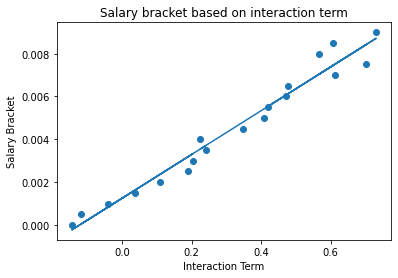

In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np

brackets = {}

for brack in pitchers['salary_bracket'].unique():
  brackets[brack] = pitchers.loc[pitchers['salary_bracket'] == brack, 'interaction_term'].mean()


y = np.array(list(brackets.keys())).reshape(-1,1)
x = np.array(list(brackets.values())).reshape(-1,1)

#Initialize and fit the model
reg_pitch = LinearRegression()
reg_pitch.fit(x, y)

plt.plot(x, reg_pitch.predict(x))

plt.scatter(brackets.values(), brackets.keys())
plt.xlabel("Interaction Term")
plt.ylabel("Salary Bracket")
plt.title("Salary bracket based on interaction term")

plt.show()

That looks pretty promising. Let's calculate the R-squared value to make sure there is a correlation between the interaction term and the salary bracket.

In [33]:
# compute with formulas from the theory
guess = reg_pitch.predict(x)
residuals = sum((y-guess)**2)       
total = sum((y-np.mean(y))**2)     
r_squared = 1 - residuals/total
print(r_squared)

[0.96553238]


We see that our R-squared value is .968. That shows a huge correlation between the pitchers performace level and their salary. We can therefore reject our null hypothesis in terms of the pitchers as well.

#Let's put it to the test!

Now that we have seen that there is a correlation between the players performace and their salary, let's see how well we can do at guessing their salary. Below, we will enter a player, a year, and whether or not they are a pitcher. We will use the interaction term we calculated to find their salary. We will let you know how we did by comparing it their real salary.

In [34]:
def salary():
  name = input("What is the player's name? ")
  playerID = list(data_people.loc[data_people['nameFirst'] + " " + data_people['nameLast'] == name, 'playerID'])[0]
  year = int(input("What year? "))
  pitcher = input("Is he a pitcher (y or n)? ")

  if pitcher == 'y':
    int_term = list(pitchers.loc[(pitchers['playerID'] == playerID) & (pitchers['yearID'] == year), 'interaction_term'])[0]
    sal_fraction = reg_pitch.coef_[0][0] * int_term + reg_pitch.intercept_[0]
    sal_brack = sal_fraction * 10000 // 5 * 5 / 10000
    print("Our guess:", sal_brack)
    print("Actual bracket:", list(pitchers.loc[(pitchers['playerID'] == playerID) & (pitchers['yearID'] == year), 'salary_bracket'])[0])
  else:
    int_term = list(batters.loc[(batters['playerID'] == playerID) & (batters['yearID'] == year), 'interaction_term'])[0]
    sal_fraction = reg_bat.coef_[0][0] * int_term + reg_bat.intercept_[0]
    sal_brack = sal_fraction * 10000 // 5 * 5 / 10000
    print("Our guess:", sal_brack)
    print("Actual bracket:", list(batters.loc[(batters['playerID'] == playerID) & (batters['yearID'] == year), 'salary_bracket'])[0])

Let's call it a few times for a few different players:

Need to pick players that are close to actual salary!

In [44]:
salary()

What is the player's name? Ryan Zimmerman
What year? 2016
Is he a pitcher (y or n)? n
Our guess: 0.0025
Actual bracket: 0.0035


# Conclusion
We have looked through player salaries from 1985 through 2016 and analyzed the descrepancies in relevant statistics between the highest and lowest paid players. 

We hope this will give you insight into what factors teams consider when paying their players and how much specific statistics matter to contracts.

Teams value a batter's OPS, AVG, and especially HR and value a pitcher's BB%, SO%, ERA, and especially innings pitched as, ultimately, the more quality innings you can provide, the more value you are bringing to your team.

Feel free to prove our analysis by inputting a player's name, year played, and whether or not he is a pitcher to check whether our predicted salary matches his actual salary.